In [2]:
!python3 test_reading_video_speed.py

OpenCV: Read 138 frames in 0.58 seconds.
^C
Traceback (most recent call last):
  File "/home/villi/Desktop/PainAssessmentVideo/test_reading_video_speed.py", line 52, in <module>
    av_read_speed(video_path)
  File "/home/villi/Desktop/PainAssessmentVideo/test_reading_video_speed.py", line 32, in av_read_speed
    frame_count += 1
KeyboardInterrupt


/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/villi/Desktop/PainAssessmentVideo/VideoMAEv2/models/modeling_finetune.py:459: UserWarning: Overwriting vit_small_patch16_224 in registry with VideoMAEv2.models.modeling_finetune.vit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_small_patch16_224(pretrained=False, **kwargs):
/home/v

Centered landmarks: (478, 3)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


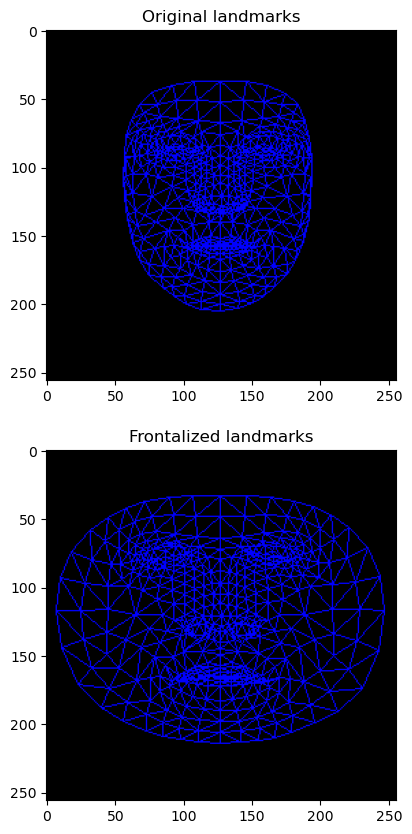

In [ ]:
import pickle
import numpy as np
import os
from custom.faceExtractor import FaceExtractor
import matplotlib.pyplot as plt

def load_reference_landmarks(path):
  ref_landmarks = pickle.load(open(path, 'rb'))
  ref_landmarks = ref_landmarks['mean_facial_landmarks']
  return ref_landmarks

face_extractor = FaceExtractor()
ref_landmarks = load_reference_landmarks(os.path.join('partA', 'video', 'mean_face_landmarks_per_subject', 'all_subjects_mean_landmarks.pkl'))
shift = np.mean(ref_landmarks, axis=0)
shift = ref_landmarks[1]
centered_landmarks = [landmark - shift for landmark in ref_landmarks]
centered_landmarks = np.array(centered_landmarks)

black_image = np.zeros((256,256,3),dtype=np.uint8)
tmp = ((centered_landmarks+0.5)*256).astype(np.int32)
orig_landmarks = face_extractor.plot_landmarks_triangulation(black_image,tmp)
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].set_title('Original landmarks')
ax[0].imshow(orig_landmarks)
print('Centered landmarks:',centered_landmarks.shape)
# U,S,Vt = np.linalg.svd(centered_landmarks,full_matrices=False)
# print('U:',U.shape)
# print('S:',S.shape)
# print('Vt:',Vt)
landmarks_3d_norm = np.linalg.norm(centered_landmarks, axis=1,ord=2)
landmarks_2d_norm = np.linalg.norm(centered_landmarks[:, :2], axis=1, ord=2)
epsilon = 1e-6
landmarks_2d_norm[landmarks_2d_norm == 0] = epsilon
ratio = np.array(landmarks_3d_norm / landmarks_2d_norm, dtype=np.float32).reshape(-1, 1)
centered_landmarks_2d = centered_landmarks[:, :2] * ratio
frontalized_landmarks = face_extractor.plot_landmarks_triangulation(black_image,((centered_landmarks_2d+0.5)*256).astype(np.int32))
ax[1].set_title('Frontalized landmarks')
ax[1].imshow(frontalized_landmarks)

In [8]:
# !python3 test_speed_frontalization.py --gv True --stop 1 
!python3 extract_video_frontalized.py --gv --pfo partA/video/video_frontalized/test --ltv "082109_m_53/082109_m_53-PA2-056.mp4"

/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/villi/Desktop/PainAssessmentVideo/VideoMAEv2/models/modeling_finetune.py:459: UserWarning: Overwriting vit_small_patch16_224 in registry with VideoMAEv2.models.modeling_finetune.vit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_small_patch16_224(pretrained=False, **kwargs):
/home/v

In [ ]:
!python3 train_model.py --mt S --gp 0 --ep 3

/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/villi/miniconda3/envs/videoMaev2_project/lib/python3.10/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/home/villi/Desktop/PainAssessmentVideo/VideoMAEv2/models/modeling_finetune.py:459: UserWarning: Overwriting vit_small_patch16_224 in registry with VideoMAEv2.models.modeling_finetune.vit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_small_patch16_224(pretrained=False, **kwargs):
/home/v

ref_landmarks (478, 3)


W0000 00:00:1738157627.557572 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157627.634911 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157628.286870 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


250.92814976217582


W0000 00:00:1738157629.112959 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157629.178966 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157629.872419 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


247.36374078964695


W0000 00:00:1738157630.433397 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157630.497998 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157631.006895 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


256.41910949629766


W0000 00:00:1738157631.919734 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157631.985250 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157632.672366 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


251.18131828296362


W0000 00:00:1738157633.504708 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157633.566671 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157634.235562 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


255.03255419913927


W0000 00:00:1738157635.046582 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157635.109033 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157635.747561 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


237.83185172815075


W0000 00:00:1738157636.535049 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157636.604283 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157637.249394 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


249.92793940088458


W0000 00:00:1738157638.148997 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157638.217980 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157638.877188 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


277.8878900596645


W0000 00:00:1738157639.704155 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157639.773166 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157640.423211 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


242.9800608365333


W0000 00:00:1738157641.211153 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157641.274468 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157641.647888 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


254.8078580952265


W0000 00:00:1738157642.476615 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157642.549872 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1738157643.222650 2075807 face_landmarker_graph.cc:169] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


260.76091732362363


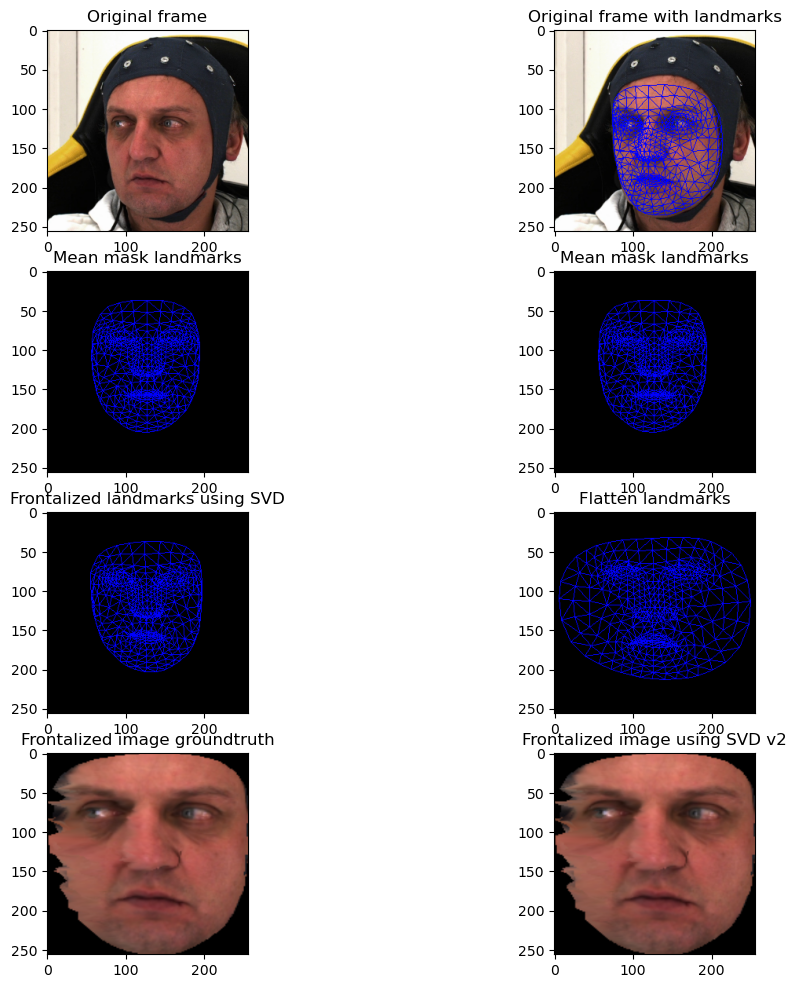

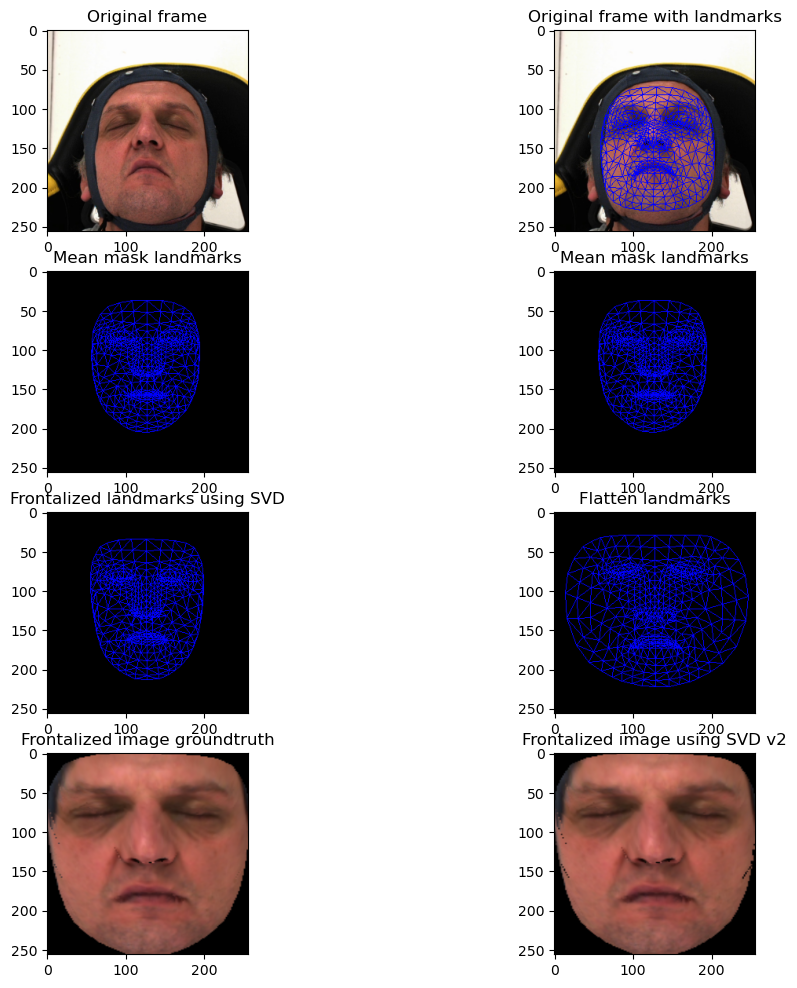

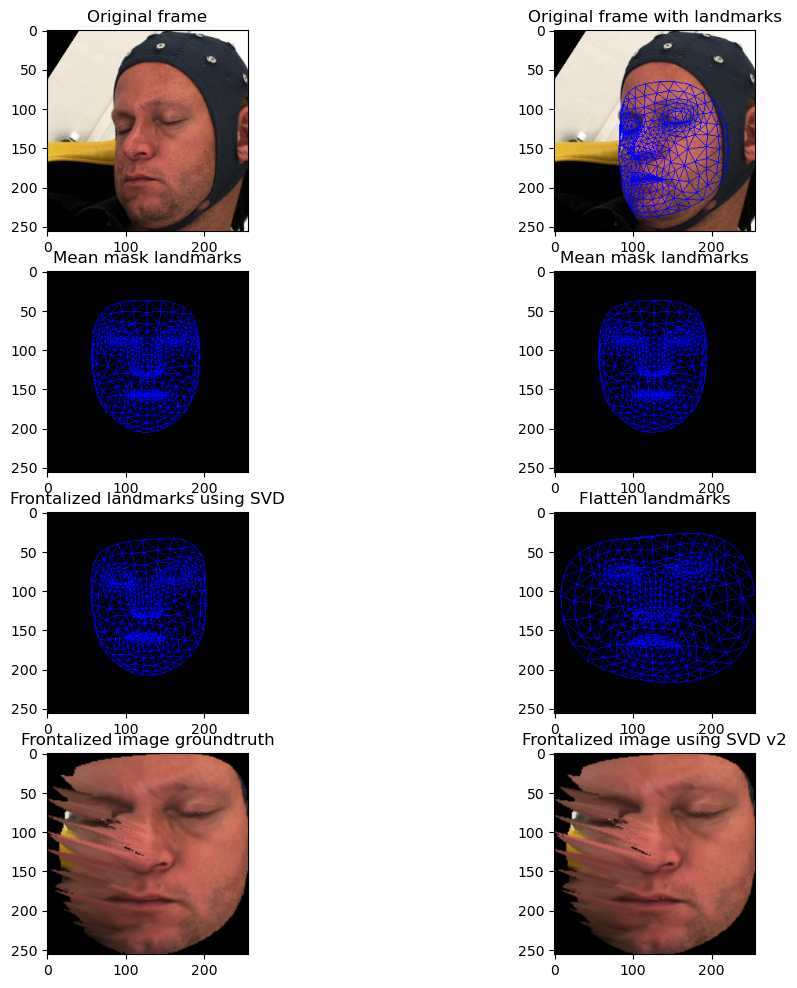

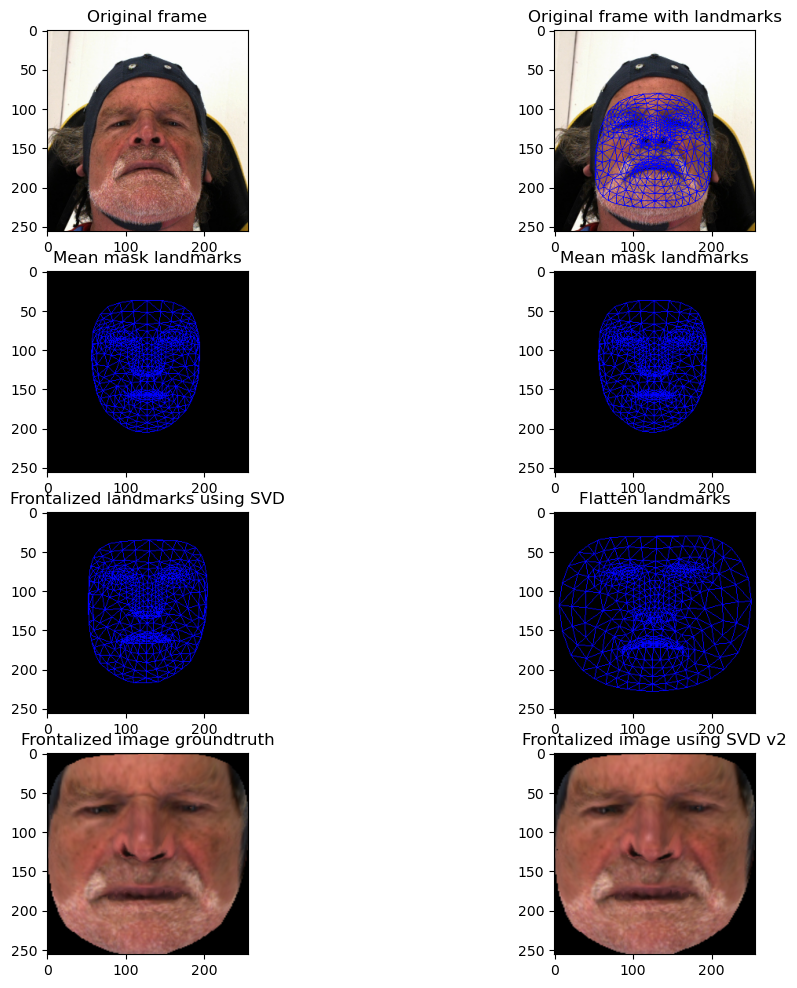

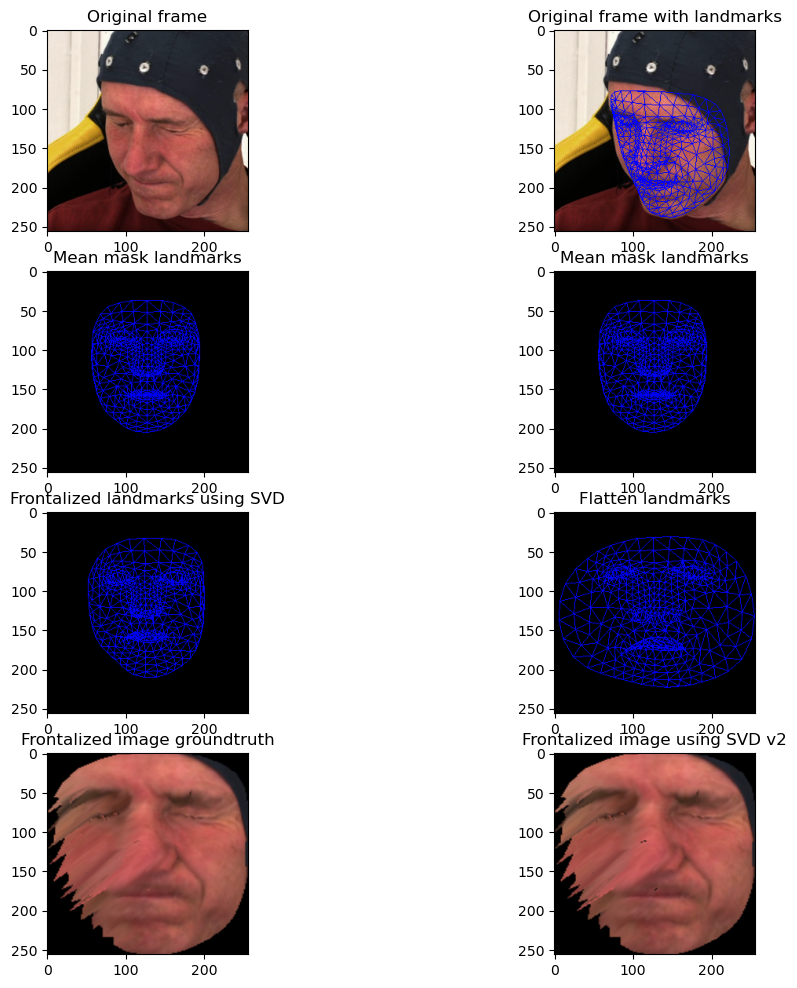

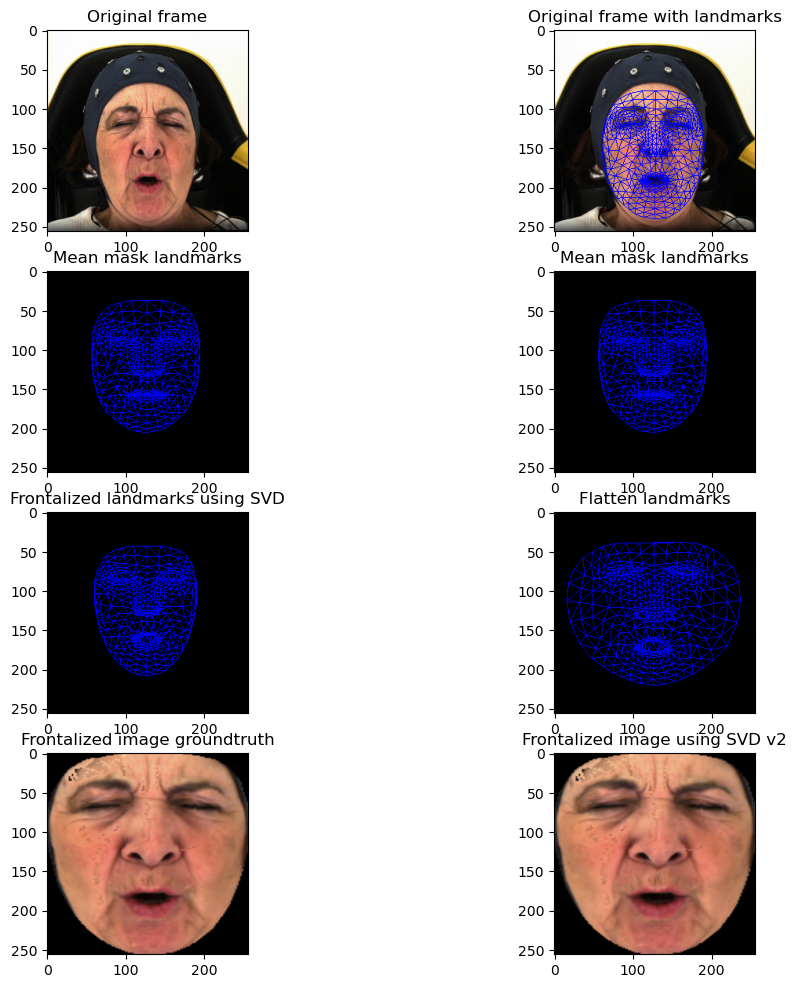

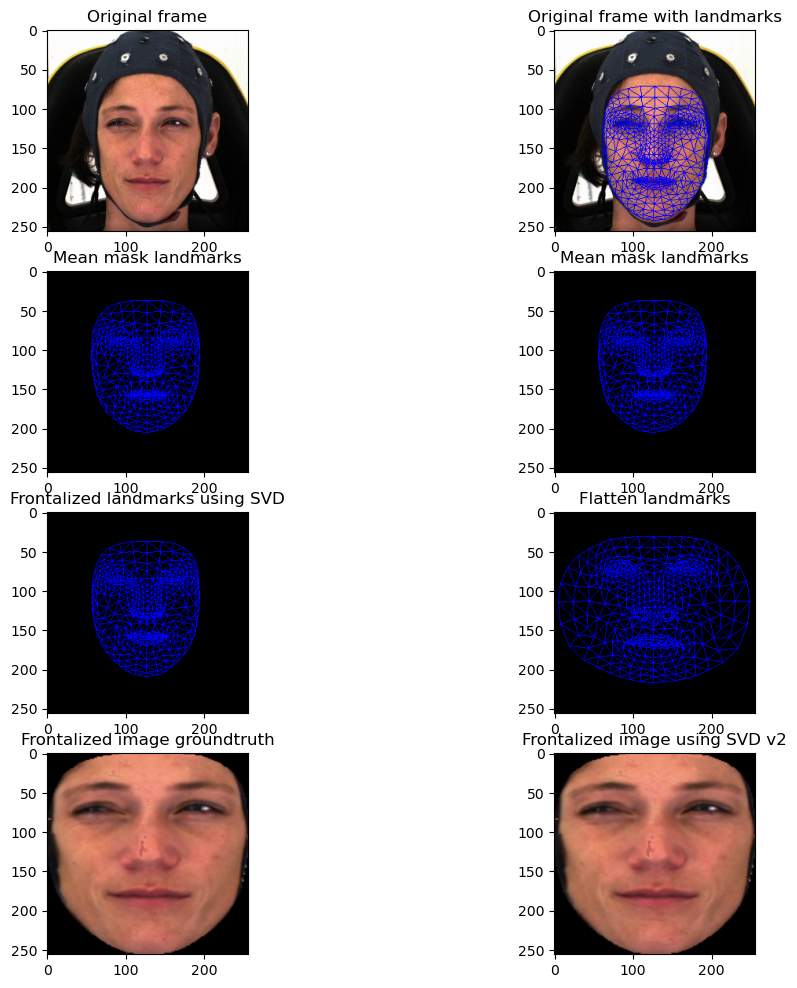

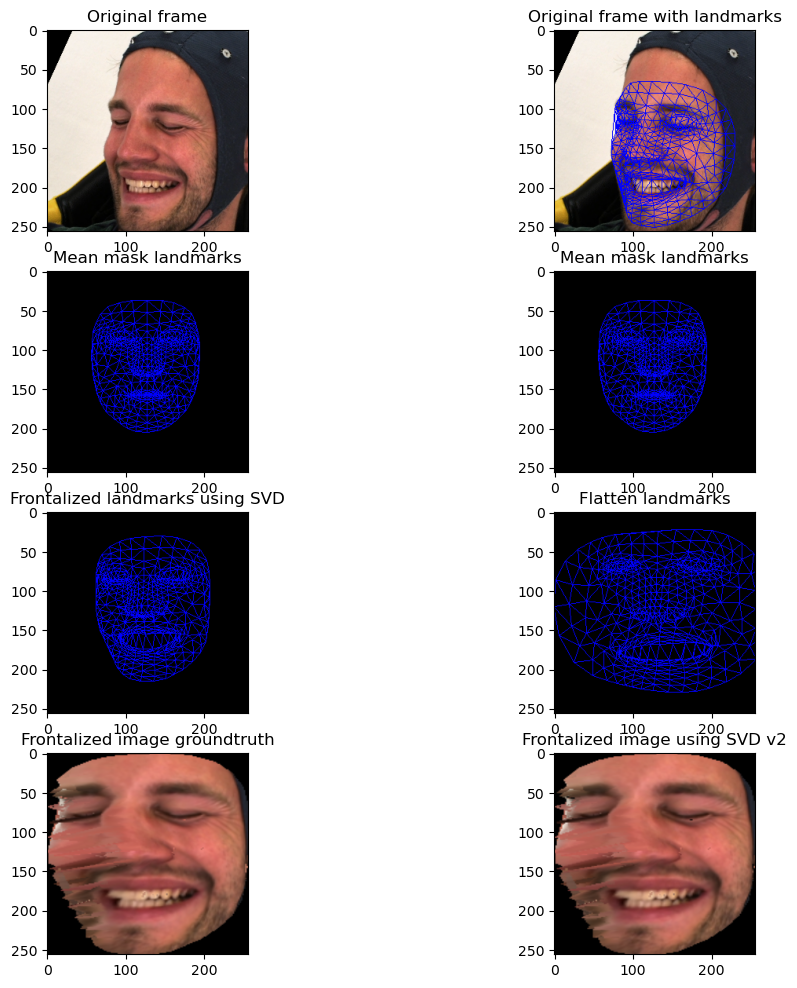

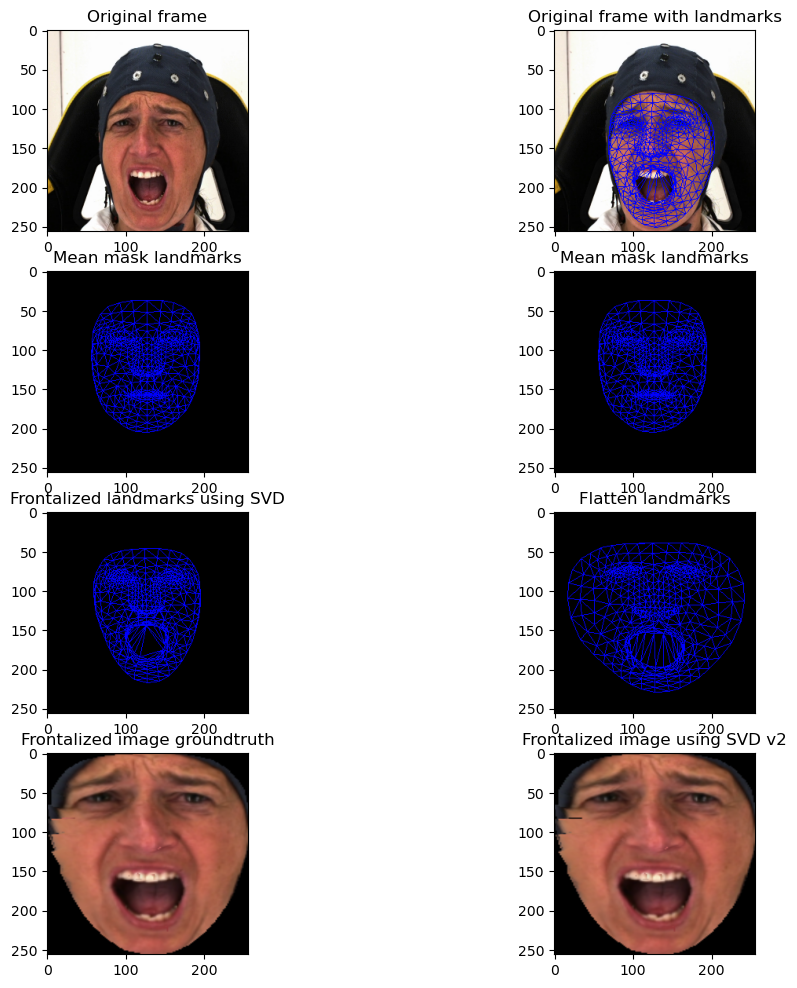

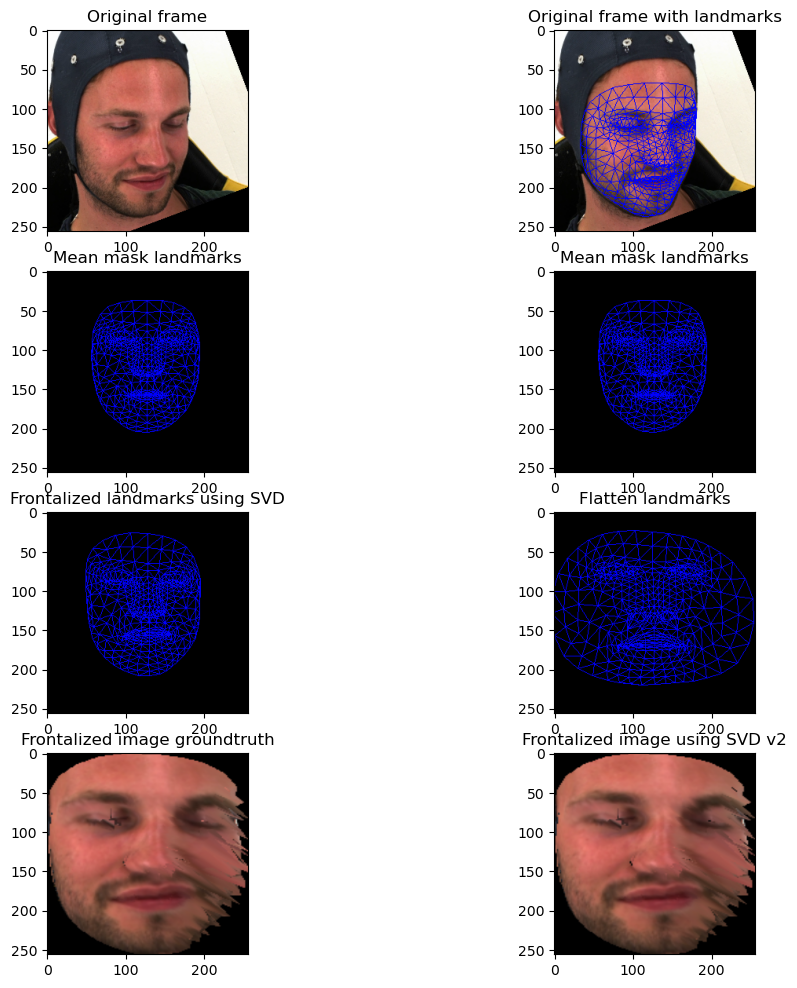

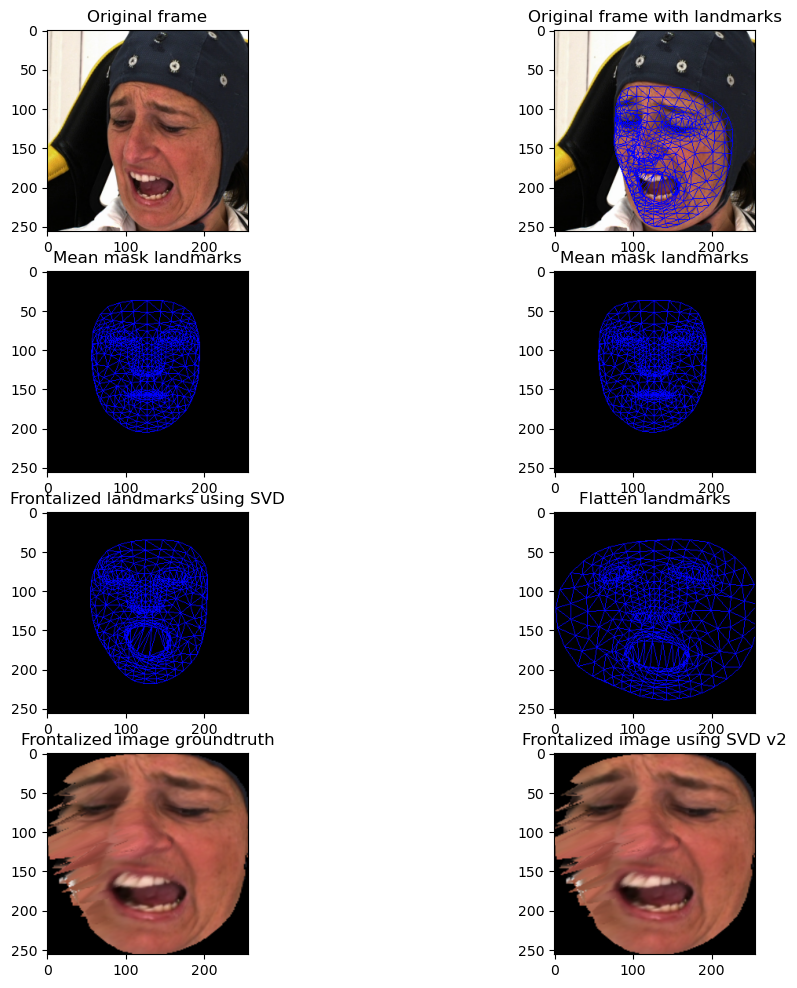

In [ ]:
import mediapipe as mp
import cv2
import numpy as np
import os
import custom.faceExtractor as extractor
import matplotlib.pyplot as plt
import pickle
import time 

# from custom.tools_face_elaboration import rigid_transform_3D,get_frontalized_img

# def plot_image_with_title(image, title):
#   fig, ax = plt.subplots(1, 1)
#   plt.title(title)
#   plt.imshow(image)
#   plt.show()

# def get_aligned_frames_from_video(video_path):
#   face_extractor = extractor.FaceExtractor(visionRunningMode='video')
#   list_aligned_frames = face_extractor._get_list_frame(path_video_input=video_path,
#                                                        align=True)
#   return list_aligned_frames, face_extractor

def get_aligned_images_from_list(list_imgs):
  face_extractor = extractor.FaceExtractor(visionRunningMode='image')
  list_aligned_frames = []
  for img in list_imgs:
    list_aligned_frames.append(face_extractor.align_face(img))
  return list_aligned_frames, face_extractor

def load_reference_landmarks(path):
  ref_landmarks = pickle.load(open(path, 'rb'))
  ref_landmarks = ref_landmarks['mean_facial_landmarks']
  return ref_landmarks

def get_list_imgs_from_folder(folder_path):
  list_imgs = []
  name_imgs = []
  for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    list_imgs.append(img)
    name_imgs.append(img_name[:-4])
  return list_imgs,name_imgs


################## Main code ##################
timestamp = time.time()
saving_test_path = os.path.join('test_frontalization_imgs','tests',f'test_{int(timestamp)}')

if not os.path.exists(saving_test_path):
  os.makedirs(saving_test_path)

folder_imgs_path = os.path.join('test_frontalization_imgs','imgs')
list_frames,name_imgs = get_list_imgs_from_folder(folder_imgs_path)
list_aligned_images, face_extractor = get_aligned_images_from_list(list_frames)

ref_landmarks = load_reference_landmarks(os.path.join('partA', 'video', 'mean_face_landmarks_per_subject', 'all_subjects_mean_landmarks.pkl'))
print(f'ref_landmarks {ref_landmarks.shape}')
# ref_landmarks = convert_landmarks(face_extractor, ref_landmarks)
# black_img = plot_landmarks_on_image(face_extractor=face_extractor,
#                                     image=list_aligned_images[0],
#                                     black=True,
#                                     landmarks=ref_landmarks)
img_base_landmarks = face_extractor.plot_landmarks_triangulation(image=np.zeros((256, 256, 3), dtype=np.uint8),
                                                                  landmarks=ref_landmarks)

for frame,name_img in zip(list_aligned_images,name_imgs):
  orig_frame = np.copy(frame)
  # orig_frame = np.array(face_extractor.align_face(frame),dtype=np.uint8)
  landmarks = face_extractor.extract_facial_landmarks([(orig_frame, timestamp)])
  landmarks = np.array([[lm.x, lm.y, lm.z] for lm in landmarks[0].face_landmarks[0]])
  orig_frame_w_landmarks = face_extractor.plot_landmarks_triangulation(image=orig_frame,
                                                                      landmarks=landmarks)
  stop_after = 0
  frontalized_img_SVD,landmarks_aligned_SVD = face_extractor.frontalize_img(frame=orig_frame,
                                                      ref_landmarks=ref_landmarks,
                                                      frontalization_mode='SVD',
                                                      v2=False,
                                                      stop_after=stop_after)
  
  frontalized_img_SVD_v2,landmarks_aligned_SVD_2 = face_extractor.frontalize_img(frame=orig_frame,
                                                      ref_landmarks=ref_landmarks,
                                                      frontalization_mode='SVD',
                                                      v2=True,
                                                      stop_after=stop_after)
  
  # frontalized_img_cv2,landmarks_aligned_cv2 = face_extractor.frontalize_img(frame=orig_frame,
  #                                                     ref_landmarks=ref_landmarks,
  #                                                     frontalization_mode='CV2')
  landmarks_aligned_SVD = face_extractor.plot_landmarks_triangulation(image=np.zeros_like(orig_frame),
                                                                      landmarks=landmarks_aligned_SVD)
  # landmarks_aligned_cv2 = face_extractor.plot_landmarks_triangulation(image=np.zeros_like(orig_frame),
  #                                                                     landmarks=landmarks_aligned_cv2)
  
  flatten_landmarks = (face_extractor.get_flatten_landmarks(landmarks_aligned_SVD_2)+0.5)*256
  print(np.max(flatten_landmarks))
  img_flatten_landmarks = face_extractor.plot_landmarks_triangulation(image=np.zeros((256, 256, 3)),
                                                                      landmarks=(flatten_landmarks).astype(np.int32))
  fig, ax = plt.subplots(4,2, figsize=(12,12))
  ax[0,0].imshow(frame)
  ax[0,0].set_title('Original frame')

  ax[0,1].imshow(orig_frame_w_landmarks)
  ax[0,1].set_title('Original frame with landmarks')
  
  ax[1,0].imshow(img_base_landmarks)
  ax[1,0].set_title('Mean mask landmarks')
  ax[1,1].imshow(img_base_landmarks)
  ax[1,1].set_title('Mean mask landmarks')
  
  ax[2,0].imshow(landmarks_aligned_SVD)
  ax[2,0].set_title('Frontalized landmarks using SVD')

  ax[2,1].imshow(img_flatten_landmarks)
  ax[2,1].set_title('Flatten landmarks')

  ax[3,0].imshow(frontalized_img_SVD)
  ax[3,0].set_title('Frontalized image groundtruth')

  ax[3,1].imshow(frontalized_img_SVD_v2)
  ax[3,1].set_title('Frontalized image using SVD v2')
  # save all the images
  plt.savefig(os.path.join(saving_test_path, f'{name_img}_plot.png'))
  # plt.close()
  # break

In [ ]:
# !python3 plot_tsne.py --sfd partA/video/features/samples_16_aligned_cropped --sptsne tsne_Results/samples_16_aligned_cropped/
!python3 plot_tsne.py --sfd partA/video/features/samples_16 --sptsne tsne_Results/samples_16/

In [ ]:
import numpy as np
from scipy.spatial import procrustes
import open3d as o3d

# Step 1: Load 3D landmarks of the face and the reference model
# Example landmarks (replace these with your actual data)
face_landmarks = np.array([
    [1.2, 2.3, 0.5],
    [2.1, 2.9, 0.8],
    [1.8, 2.0, 0.3],
    [1.5, 2.5, 0.4],
    [2.0, 2.2, 0.6],
])

reference_landmarks = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0.5, 0.5, 0],
    [0, 1, 0],
    [0.5, 0.25, 0.5],
])  # Canonical landmarks (e.g., average face landmarks)

# Step 2: Perform Procrustes analysis for alignment
mtx1, mtx2, disparity = procrustes(reference_landmarks, face_landmarks)

print("Aligned landmarks:")
print(mtx2)  # mtx2 is the transformed face landmarks

# Step 3: Apply the transformation to the entire face model
# (if you have a 3D face mesh)
# Load a 3D face model (e.g., as a point cloud)
# Example: point cloud of the face model (replace with your actual model)
face_model = o3d.geometry.PointCloud()
face_model.points = o3d.utility.Vector3dVector(face_landmarks)

# Apply the transformation
transformed_points = np.dot(np.array(face_model.points), mtx2.T)  # Adjust transformation logic if necessary
face_model.points = o3d.utility.Vector3dVector(transformed_points)

# Step 4: Visualize the aligned model
o3d.visualization.draw_geometries([face_model])


ModuleNotFoundError: No module named 'open3d'

frontalization_weights.shape: (137, 136)
landmarks_frontal.shape: (68, 2)


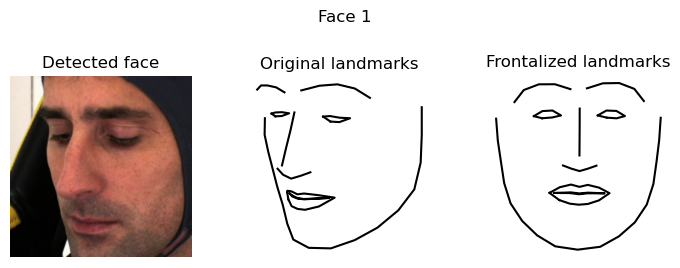

In [3]:
# os.chdir(path="facialLandmarkFrontalization")
import numpy as np
import dlib
import matplotlib.pyplot as plt
from facialLandmarkFrontalization.source.utils import plot_landmarks, frontalize_landmarks, get_landmark_array

# import utils.plot_landmarks, utils.frontalize_landmarks, utils.get_landmark_array
# import imageio
import cv2
from IPython.display import display

plt.close('all')
# facialLandmarkFrontalization
detector = dlib.get_frontal_face_detector() 
predictor = dlib.shape_predictor("facialLandmarkFrontalization/data/shape_predictor_68_face_landmarks.dat") 
frontalization_weights = np.load('facialLandmarkFrontalization/data/frontalization_weights.npy')
print(f'frontalization_weights.shape: {frontalization_weights.shape}')
# image = imageio.imread('../data/faces.jpg')  # load image
image = cv2.imread('facialLandmarkFrontalization/test.png')  # load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
faces = detector(image)  # detect faces

for i, face in enumerate(faces):
    
    landmarks_raw = predictor(image, face)  # detect landmarks
    landmarks = get_landmark_array(landmarks_raw)
    landmarks_frontal = frontalize_landmarks(landmarks, frontalization_weights)
    print(f'landmarks_frontal.shape: {landmarks_frontal.shape}')
    if landmarks is not None:
        
        # initialize new image
        fig = plt.figure(figsize=(7,3))
        
        plt.subplot(1,3,1)
        plt.title('Detected face')
        x1 = landmarks_raw.rect.left()
        y1 = landmarks_raw.rect.top()
        x2 = x1 + landmarks_raw.rect.width()
        y2 = y1 + landmarks_raw.rect.height()
        plt.imshow(image[y1:y2, x1:x2, :])
        plt.axis(False)
        
        plt.subplot(1,3,2)
        plt.title('Original landmarks')
        
        plt.subplot(1,3,3)
        plt.title('Frontalized landmarks')
        
        plt.suptitle('Face ' + str(i+1))
        plt.tight_layout()
        axes = fig.get_axes()
        
        plot_landmarks(landmarks, axis=axes[1])
        plot_landmarks(landmarks_frontal, axis=axes[2])
        plt.show()
        

# VideoMAEv2 model availables

### Pre-train

| Model | Config | Dataset | 
| :---: | :----  | :-----: | 
| ViT-giant | vit_g_hybrid_pt_1200e | UnlabeledHybrid | 

### Fine-tune
| Model | Config | Dataset | Pre-train | Post-pre-train |
| :---: | :----  | :-----: | :-------: | :------------: |
| ViT-giant | vit_g_hybrid_pt_1200e_k710_ft | K710 | UnlabeledHybrid | None |
| ViT-giant | vit_g_hybrid_pt_1200e_k400_ft | K400 | UnlabeledHybrid | None |
| ViT-giant | vit_g_hybrid_pt_1200e_k710_it_k400_ft | K400 | UnlabeledHybrid | K710 |
| ViT-giant | vit_g_hybrid_pt_1200e_k710_it_k600_ft | K600 | UnlabeledHybrid | K710 |
| ViT-giant | vit_g_hybrid_pt_1200e_ssv2_ft | SSv2 | UnlabeledHybrid | None |
| ViT-giant | vit_g_hybrid_pt_1200e_k710_it_ucf101_ft | UCF101 | UnlabeledHybrid | K710 |
| ViT-giant | vit_g_hybrid_pt_1200e_k710_it_hmdb51_ft | HMDB51 | UnlabeledHybrid | K710 |

### Distillation from giant
|  Model  | Dataset | Teacher Model  |
| :-----: | :-----: | :-----------: |
| ViT-small | K710 | vit_g_hybrid_pt_1200e_k710_ft |
| ViT-base | K710 | vit_g_hybrid_pt_1200e_k710_ft | 

### Model details

|  model  | frame channels | frame sampling | frame size (H,W) | tubelet size | patch size | emb dim | output tensor | mem(GB) |
| :-----: | :-----: | :-----------: | :-----: | :-----: | :-----------: | :-----: | :-----: |:----|
| giant | 3 | 16 | (224,224) | 2 | (14,14) | 1408 | [8,16,16,1408] | 4.0 |
| base | 3 | 16 | (224,224) | 2 | (16,16) | 768 | [8,14,14,768] | 0.4|
| small | 3 | 16 | (224,224) | 2 | (16,16) | 384 | [8,14,14,1408] | 0.09|
 


CASE 1
flow -> [batch_video,nr_windows=8,(8,14,14,768)] => 
    => spatial mean reduction =>
    =>[batch_video,nr_windows=8,(8,1,1,768)] => 
    => RESHAPE =>
    => [batch_video,nr_windows=8,(8*1*1*768)] =>
    => 2 GRU((6144,512)|dropout(0.5)|(512,512)) + linear proj (512,1) =>
    => [batch_video,1]

CASE 2
flow -> [batch_video,nr_windows=8,(8,14,14,768)] => 
    => spatial mean reduction =>
    =>[batch_video,nr_windows=8,(8,1,1,768)] => 
    => RESHAPE =>
    => [batch_video,nr_windows=8*8,(1*1*768)] =>
    => 2 GRU((768,512)|drop_out(0.3)|(512,512)) + linear proj (512,1) =>
    => [batch_video,1]
    


# Code (w/ lib) 

Add sanity check when init to see if folders and custom methods are created

Kernel: RBF that can handle non-linear pattern
C: Low to avoid overfit
eps:  high values lead to a simpler model but potentially less precise predictions
      low values require tighter predictions, which can make the model more complex

WHAT I HAVE:

CLIPS_REDUCTION values:
  MEAN: 0 (applied in action recognition)
  GRU: lstm (work in progress)

EMBEDDING_REDUCTION values:
  MEAN_TEMPORAL: 1      [keep spatial information]
  MEAN_SPATIAL: (2, 3)  [keep temporal information]
  MEAN_TEMPORAL_SPATIAL: (1, 2, 3) [applied in action recognition]
  GRU: GRU (work in progress)

MODEL_TYPE values:
  VIDEOMAE_v2_S: smaller model
  VIDEOMAE_v2_B: base model
  VIDEOMAE_v2_G_pt_1200e: giant model w/h intermediate fine-tuning
  VIDEOMAE_v2_G_pt_1200e_K710_it_HMDB51_ft: giant model fine-tuned

SAMPLE_FRAME_STRATEGY values:
  UNIFORM: uniform
  SLIDING_WINDOW: sliding_window
  CENTRAL_SAMPLING: central_sampling
  RANDOM_SAMPLING: random_sampling

HEAD
  SVR
____________________________________________________________________________


TESTING SETTINGS GRID_SEARCH
model_type = MODEL_TYPE.VIDEOMAE_v2_B
embedding_reduction = EMBEDDING_REDUCTION.MEAN_TEMPORAL_SPATIAL
clips_reduction = CLIPS_REDUCTION.MEAN
sample_frame_strategy = SAMPLE_FRAME_STRATEGY.UNIFORM

path_labels = os.path.join('partA','starting_point','subsamples_100_400.csv') # 110 samples per class, 400 samples in total
path_dataset = os.path.join('partA','video','video')
k_cross validation = 5 (Stratified K-Fold cross-validator-> The folds are made by preserving the percentage of samples for each class.)

grid_search = {
  'kernel': ['rbf'],
  'C': [0.1, 1, 10],
  'epsilon': [0.1, 1, 10, 100],
}

Form table we have:
  best_estimator ={
    kernel:'rbf',
    'C': [0.1, 1, 10]
    'epsilon':[10, 100]
  }

<div style="overflow-x: auto;">

## PSPI from (Action Units)
Pain expression is widely characterized by the activation of a small set of facial muscles and coded by a set of
corresponding actions units (AUs): 
| Action units  | Meaning              | Range   |
|----------------|----------------------|---------|
| AU 4          | brow lowering        | 0 to 5  |
| AU 6 and AU 7 | orbital tightening   | 0 to 5  |
| AU 9 and AU 10| levator labii raise  | 0 to 5  |
| AU 43         | eye closure          | 0 or 1  |
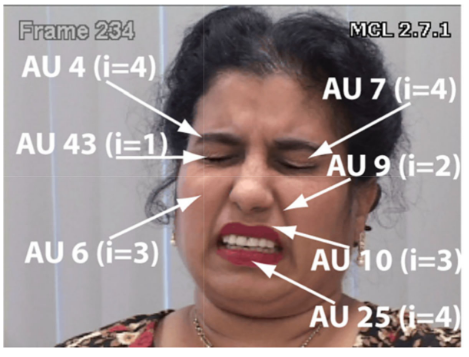

STEPS for preprocessing:
1) Align faces by fixing the inter-ocular distance.
2) Compute mean facial shape by averaging all of the landmark points in the roughly aligned faces.
3) Warp each face in the database to the average face using piece-wise linear warping,where the facial pieces are formed using Delaunay triangulation.
4) Crop out the normalized faces by forming a mask with the convex hull of the landmark points resulting in 224×224 images

In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
import custom.faceExtractor as extractor
import os
import time
import pickle
import custom.tools as tools

import numpy as np
import custom.faceExtractor as extractor
import os
import time
import cv2
import pickle
import custom.tools as tools
import matplotlib.pyplot as plt

root_video_path = 'partA/video/video'
csv_array,cols = tools.get_array_from_csv(csv_path=os.path.join('partA','starting_point','samples.csv'))
list_subject_name = np.unique(csv_array[:,1])
face_ln_saving_folder = 'partA/video/mean_face_landmarks_per_subject'
saving_plot_landmarks_folder = os.path.join(face_ln_saving_folder,'plot_landmarks')
if not os.path.exists(saving_plot_landmarks_folder):
  os.makedirs(saving_plot_landmarks_folder)
if not os.path.exists(face_ln_saving_folder):
  os.makedirs(face_ln_saving_folder)
face_extractor = extractor.FaceExtractor()
start = time.time()
count = 0

for subject_name in list_subject_name:
  folder_path = os.path.join(root_video_path, subject_name)
  all_videos = os.listdir(folder_path)
  sample_video_path = [os.path.join(folder_path, video) for video in all_videos]
  all_mean_facial_landmarks,count_frame=face_extractor.get_mean_facial_landmarks(list_video_path=sample_video_path[:3],
                                                                                 align=True,
                                                                                 numpy_view=True)
  dict_subject = {'subject_name':subject_name,
                  'mean_facial_landmarks':all_mean_facial_landmarks,
                  'count_frame':count_frame}
  
  with open(os.path.join(face_ln_saving_folder,subject_name+'.pkl'), 'wb') as f:
    pickle.dump(dict_subject, f)
  all_mean_facial_landmarks = face_extractor.convert_from_numpy_to_NormalizedLandmark(all_mean_facial_landmarks)
  img = np.zeros((256,256,3))
  annotated_img,_ = face_extractor.plot_landmarks(image=img,landmarks=all_mean_facial_landmarks,connections=face_extractor.FACE_TESSELATION)
  
  # print(np.max(annotated_img))
  # cv2.imwrite(os.path.join(saving_plot_landmarks_folder,subject_name+'.png'),annotated_img)
  # fig, ax = plt.subplots(figsize=(10,10))
  # im = ax.imshow(annotated_img/255,origin='lower')
  # plt.savefig(os.path.join(saving_plot_landmarks_folder,subject_name+'.png'))
  total_time = time.time()-start
  count += 1
  expected_time = total_time/count*len(list_subject_name)
  print('-'*30)
  print(f'{subject_name} saved in path {os.path.join(face_ln_saving_folder,subject_name+".pkl")}')
  print(f'Processed {count}/{len(list_subject_name)} subjects')
  print(f'Expected end: {int(expected_time/60/60)} h {int(expected_time/60)%60} m {int(expected_time)%60} s')
  print(f'Total time  : {int(total_time/60/60)} h {int(total_time/60)%60} m {int(total_time)%60} s')
  print('-'*30)
  


ModuleNotFoundError: No module named 'torch'

In [36]:
import matplotlib.pyplot as plt
import custom.tools as tools
import numpy as np
import os
import pickle
import custom.faceExtractor as extractor

csv_array,cols = tools.get_array_from_csv(csv_path=os.path.join('partA','starting_point','samples.csv'))
list_subject_name = np.unique(csv_array[:,1])
all_mean_facial_landmarks = np.zeros((478,3),dtype=np.float32)
face_ln_saving_folder = 'partA/video/mean_face_landmarks_per_subject'
count = 0
face_extractor = extractor.FaceExtractor()
for subject_name in list_subject_name:
  count+=1
  with open(os.path.join(face_ln_saving_folder,subject_name+'.pkl'), 'rb') as f:
    dict_subject = pickle.load(f)
    mean_facial_landmarks = dict_subject['mean_facial_landmarks']
    count_frame = dict_subject['count_frame']
        
  black_img = np.zeros((256,256,3), dtype=np.uint8)
  
  all_mean_facial_landmarks += mean_facial_landmarks

all_mean_facial_landmarks /= len(list_subject_name)  
ln = face_extractor.convert_from_numpy_to_NormalizedLandmark(all_mean_facial_landmarks)
annotated_image,_ = face_extractor.plot_landmarks(image=black_img, 
                                                landmarks=ln,
                                                connections=face_extractor.FACE_TESSELATION)

dict_subject = {'mean_facial_landmarks':all_mean_facial_landmarks,
                'count_subject':count}

with open(os.path.join(face_ln_saving_folder,'all_subjects_mean_landmarks.pkl'), 'wb') as f:
  pickle.dump(dict_subject, f)
  print('All subjects mean landmarks saved in path:',os.path.join(face_ln_saving_folder,'all_subjects_mean_landmarks.pkl'))
  
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(annotated_image[:,:,::-1]/255)

ModuleNotFoundError: No module named 'sklearn'

In [46]:
# Read the input file and process the data
from collections import defaultdict

# File name containing the input data
file_name = 'partA/video/mean_face_landmarks_per_subject/video/logs1736508431/annotation.txt'

# Dictionary to store the counts for each sample and timestamp
align_timestamps = defaultdict(set)
detection_timestamps = defaultdict(set)
count = 0
# Parse the input file
with open(file_name, 'r') as file:
  lines = file.readlines()
dict_missing = {}
next = False
for line in lines:
    # line = line
    if line.startswith('sample:') and next:
        sample = line.split('sample:')[-1].split()[0]
        dict_missing[sample] = dict_missing.get(sample,0)+1
        timestamp = line.split('timestamp_h_m_s:')[-1]
        align_timestamps[sample].add(timestamp)
        count += 1
        next = False
    if line.startswith('type:align'):
      next = True

print(f'Video with no detection {len(dict_missing)}')
print(f'COunt frame {count}\n')
count_frame = 0
for k,v in dict_missing.items():
  print(k,v)
  count_frame += v

Video with no detection 27
COunt frame 567

072609_w_23-PA1-053.mp4 45
080609_w_27-BL1-098.mp4 30
081714_m_36-PA1-077.mp4 5
082714_m_22-PA4-055.mp4 15
091809_w_43-PA4-070.mp4 2
092514_m_50-BL1-084.mp4 4
092514_m_50-PA2-029.mp4 17
092514_m_50-PA3-027.mp4 48
092813_w_24-PA1-038.mp4 14
101015_w_43-PA3-079.mp4 13
101114_w_37-BL1-100.mp4 7
101216_m_40-BL1-100.mp4 48
101309_m_48-PA4-023.mp4 1
101814_m_58-BL1-090.mp4 10
101814_m_58-PA3-001.mp4 25
101814_m_58-PA3-014.mp4 45
101814_m_58-PA4-022.mp4 26
101814_m_58-PA4-026.mp4 13
101814_m_58-PA4-027.mp4 25
101814_m_58-PA4-028.mp4 21
101814_m_58-PA4-053.mp4 38
101814_m_58-PA4-060.mp4 17
101814_m_58-PA4-066.mp4 37
101814_m_58-PA4-069.mp4 32
101814_m_58-PA4-076.mp4 3
111914_w_63-BL1-098.mp4 6
120514_w_56-PA4-041.mp4 20


In [35]:
#Plot landmarks for subject and the mean_facial_landmarks

import matplotlib.pyplot as plt
import custom.tools as tools
import custom.faceExtractor as extractor
import numpy as np
import os

csv_array,cols = tools.get_array_from_csv(csv_path=os.path.join('partA','starting_point','samples.csv'))
list_subject_name = np.unique(csv_array[:,1])
face_ln_saving_folder = 'partA/video/mean_face_landmarks_per_subject'
saving_plot = os.path.join(face_ln_saving_folder,'plot_landmarks')
list_landmarks = []
if not os.path.exists(saving_plot):
  os.makedirs(saving_plot)
if not os.path.exists(face_ln_saving_folder):
  os.makedirs(face_ln_saving_folder)
for subject in list_subject_name:
  with open(os.path.join(face_ln_saving_folder,subject+'.pkl'), 'rb') as f:
    dict_subject = pickle.load(f)
    mean_facial_landmarks = dict_subject['mean_facial_landmarks']
    mean_facial_landmarks = face_extractor.convert_from_numpy_to_NormalizedLandmark(mean_facial_landmarks)
    black_img = np.zeros((256,256,3), dtype=np.uint8)
    annotated_image,_ = face_extractor.plot_landmarks(image=black_img, 
                                                landmarks=mean_facial_landmarks,
                                                connections=face_extractor.FACE_TESSELATION)
    plt.imshow(annotated_image[:,:,::-1]/255,origin='lower')
    plt.title(subject)
    plt.savefig(os.path.join(saving_plot,subject+'.png'))
    plt.show()
    
subject = 'all_subjects_mean_landmarks'
with open(os.path.join(face_ln_saving_folder,subject+'.pkl'), 'rb') as f:
  dict_subject = pickle.load(f)
  mean_facial_landmarks = dict_subject['mean_facial_landmarks']
  mean_facial_landmarks = face_extractor.convert_from_numpy_to_NormalizedLandmark(mean_facial_landmarks)
  black_img = np.zeros((256,256,3), dtype=np.uint8)
  annotated_image,_ = face_extractor.plot_landmarks(image=black_img, 
                                                landmarks=mean_facial_landmarks,
                                                connections=face_extractor.FACE_TESSELATION)
  plt.imshow(annotated_image[:,:,::-1]/255,origin='lower')
  plt.title(subject)
  plt.savefig(os.path.join(saving_plot,subject+'.png'))
  plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Analyze the error during face extraction

import custom.tools as tools
import custom.faceExtractor as extractor
import numpy as np
import os
import matplotlib.pyplot as plt

def read_not_detection_log(log_path):
  with open(log_path,'r') as f:
    lines = f.readlines()
    dict_not_detection = {
      'path':[],
      'frame_nr':[]
    }
    for line in lines:
      dict_not_detection['path'].append(line.split(',')[0].strip())
      dict_not_detection['frame_nr'].append(int(line.split(',')[1].strip()))
    # tmp = [line.split(',')[-1].strip() for line in lines]
    dict_not_detection['path'] = np.array(dict_not_detection['path'])
    dict_not_detection['frame_nr'] = np.array(dict_not_detection['frame_nr'])
  return dict_not_detection

csv_array,cols = tools.get_array_from_csv(csv_path=os.path.join('partA','starting_point','samples.csv'))
list_subject_name = np.array(csv_array[:,1])
list_sample_name = np.array(csv_array[:,5])
# partA/video/video/071911_w_24/071911_w_24-BL1-097.mp4
sample_video_path = [os.path.join('partA','video','video','071911_w_24','071911_w_24-BL1-097.mp4')]
# list_video_path = [os.path.join('partA','video','video',subject,sample+'.mp4') for subject,sample in zip(list_subject_name,list_sample_name)]
face_extractor = extractor.FaceExtractor()

count_frame = 0
error_log_file = os.path.join('partA','video','mean_face_landmarks_per_subject','no_detection_log.txt')
dict_not_detection = read_not_detection_log(error_log_file)
video_path_no_detect = dict_not_detection['path']
frame_nr_no_detect = dict_not_detection['frame_nr']
idx = 0
loop_nr = 0


for video_path in sample_video_path:
  loop_nr += 1
  # print(f'loop {loop_nr}/{len(list_video_path)}')
  if video_path in video_path_no_detect:
    frame_list = face_extractor._get_list_frame(video_path, align=False)
    detection_result_list = face_extractor.extract_facial_landmarks(frame_list)
    idx_video_bool = video_path_no_detect == video_path
    for frame_nr,detection_result in enumerate(detection_result_list):
      if frame_nr in frame_nr_no_detect:
        # print(f'frame {frame_nr} in video {video_path} not detected')
        frame,timestamp = frame_list[frame_nr]
        if len(detection_result.face_landmarks) == 0:
          print(f'frame {frame_nr} in video {video_path} not detected')
          fig,ax = plt.subplots(figsize=(10,10))
          fig.suptitle(f'frame {frame_nr} in video {video_path} not detected')
          plt.imshow(frame[:,:,::-1]/255)
        else:
          landmarks = detection_result.face_landmarks[0]
          annotated_image,_ = face_extractor.plot_landmarks(image=frame, 
                                                          landmarks=landmarks,
                                                          connections=face_extractor.FACE_TESSELATION)
      # fig,ax = plt.subplots(figsize=(10,10))
      
      # plt.imshow(annotated_image[:,:,::-1]/255)
      
    # if detection_result is None or len(detection_result.face_landmarks) == 0:
    # else:
      # landmarks = self.get_numpy_array(detection_result.face_landmarks[0])
      # landmarks = face_extractor.center_wrt_nose(detection_result.face_landmarks[0])
      # landmarks = self.convert_from_numpy_to_NormalizedLandmark(landmarks)
  

# if numpy_view:
#   return mean_face_landmarks,count_frame
# else:
#   return [mp.tasks.components.containers.NormalizedLandmark(x=ln[0],y=ln[1],z=ln[2]) for ln in mean_face_landmarks],count_frame

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import custom.faceExtractor as extractor
import os
import time
import cv2
import pickle
import custom.tools as tools
import matplotlib.pyplot as plt
import math

csv_path = os.path.join("partA", "starting_point", "samples.csv")
csv_array,_ = tools.get_array_from_csv(csv_path=csv_path)
video_folder_path = os.path.join("partA", "video", "video")
extracted_video_folder_path = os.path.join("partA", "video", "extracted_video")
landmarks_folder_path = os.path.join("partA", "video", "mean_face_landmarks_per_subject")
# ['subject_id', 'subject_name', 'class_id', 'class_name', 'sample_id', 'sample_name']
sample_video_path = [os.path.join(video_folder_path, sample[1],sample[5]+".mp4") for sample in csv_array]
face_extractor = extractor.FaceExtractor()
count = 0
start = time.time()
img_all_black = np.zeros((256,256,3),dtype=np.uint8)
saving_path_ln = os.path.join(landmarks_folder_path, "all_subjects_mean_landmarks.pkl")

with open(saving_path_ln, 'rb') as f:
  reference_landmarks = pickle.load(f)
  reference_landmarks = face_extractor.convert_from_numpy_to_NormalizedLandmark(reference_landmarks['mean_facial_landmarks'])

# select_sample = os.path.join()


for subject_name,sample_name in zip(csv_array[:,1],csv_array[:,5]):
  # sample_video_path = os.path.join(video_folder_path,subject_name,sample_name+'.mp4')
  sample_video_path = 'partA/video/video/101916_m_40/101916_m_40-PA3-052.mp4'
  frame_list = face_extractor._get_list_frame(sample_video_path, 
                                              align=True)
  list_landmarks_video = face_extractor.extract_facial_landmarks(frame_list=frame_list)
  for landmarks_frame,(frame,_) in zip(list_landmarks_video,frame_list):
    centered_lm = face_extractor.center_wrt_nose(landmarks_frame.face_landmarks[0])
    # centered_lm = landmarks_frame.face_landmarks[0]
    centered_ref_lm = np.array([[lm.x,lm.y,lm.z] for lm in reference_landmarks])
    centered_ref_lm = face_extractor.convert_from_numpy_to_NormalizedLandmark(centered_ref_lm)
    print(f'Nose ref: {reference_landmarks[face_extractor.NOSE_INDEX]}')
    print(f'Nose: {centered_lm[face_extractor.NOSE_INDEX]}')
    centered_lm_plot,_ = face_extractor.plot_landmarks(image=img_all_black,
                                  landmarks=centered_lm,
                                  connections=face_extractor.FACE_TESSELATION)
    centered_ref_lm_plot,_ = face_extractor.plot_landmarks(image=img_all_black,
                                  landmarks=centered_ref_lm,
                                  connections=face_extractor.FACE_TESSELATION)
    # ref_lm,_ = face_extractor.plot_landmarks(image=img_all_black,
    #                                           landmarks=reference_landmarks,
    #                                           connections=face_extractor.FACE_TESSELATION)
    # non_centered_lm, _ = face_extractor.plot_landmarks(image=img_all_black,
    #                               landmarks=landmarks_frame.face_landmarks[0],
    #                               connections=face_extractor.FACE_TESSELATION)
    fig,ax = plt.subplots(figsize=(8,8))
    fig.suptitle(f'Centered landmarks')
    plt.imshow(centered_lm_plot/255)

    fig,ax = plt.subplots(figsize=(8,8))
    fig.suptitle(f'Centered ref landmarks')
    plt.imshow(centered_ref_lm_plot/255)
    
    # fig,ax = plt.subplots(figsize=(8,8))
    # fig.suptitle(f'Ref landmarks (already centered)')
    # plt.imshow(ref_lm[:,:,::-1]/255)
    
    # if centered_lm[face_extractor.NOSE_INDEX] != centered_ref_lm[face_extractor.NOSE_INDEX]:
    #   raise ValueError('Nose not aligned')
    # print(f'centered_lm: {centered_lm}')
    # print(f'centered_ref_lm: {centered_ref_lm}')     
    # frame = face_extractor._extract_face_oval_from_img(img=frame,
    #                                                   routes=reference['mean_facial_landmarks'])
    # print(f'annotated_img: {annotated_img.shape}')
    # print(f'frame_list[0][0]: {frame_list[0][0].shape}')
    
    # centered_ref_lm = np.array([[lm.x,lm.y] for lm in centered_ref_lm])
    
    # size = (256,256)
    reference_landmarks = np.array([[lm.x,lm.y] for lm in centered_ref_lm])
    src_points = np.array([[lm.x,lm.y] for lm in centered_lm])
    dst_points = reference_landmarks
    # cv2.estimateAffine3D
    H, mask = cv2.estimateAffine2D(from_=src_points,
                                          to=dst_points)
    # H = cv2.estimateAffine3D(src=src_points,
    #                                dst=dst_points)
    # H = H[1]
    print(f'srcPoints: {src_points[4:8]}')
    print(f'dstPoints: {dst_points[4:8]}')
    print(f'H: {H}')
    annotated_img,ln_coords = face_extractor.plot_landmarks(image=frame,
                                                landmarks=landmarks_frame.face_landmarks[0],
                                                connections=face_extractor.FACE_TESSELATION)
    
    # annotated_frame,ln_coords_frame = face_extractor.plot_landmarks(image=frame,
    #                                             landmarks=centered_lm,
    #                                             connections=face_extractor.FACE_OVAL_ROUTE)
    height, width = frame.shape[:2]
    im_warped = cv2.warpPerspective(src=frame, M=H, dsize=(height,width))
    # warp frame using the homography
    # frame = cv2.warpPerspective(src=frame, M=H, dsize=(256,256))
    print(f'frame: {frame.shape}')
    fig,ax = plt.subplots(figsize=(8,8))
    fig.suptitle(f'Annotated frame')
    plt.imshow(annotated_img/255)
    #plot frame_list[0][0]
    fig,ax = plt.subplots(figsize=(8,8))
    fig.suptitle(f'Frame')
    plt.imshow(frame/255)
    fig,ax = plt.subplots(figsize=(8,8))
    fig.suptitle(f'Warped Img')
    plt.imshow(im_warped/255)
    plt.show()
    break
  
  # # face_extractor.warp_face(target_img=fr)
  # if count % 1 == 0:
  #   print('---------------------------------')
  #   print(f'Processed {count}/{len(csv_array[:,5])} videos')
  #   print(f'Total time: {time.time()-start:.2f} s')
  #   print('---------------------------------')
  #   # clear console output
  break

In [6]:
import cv2
import time

def process_video_with_cpu(video_path):
    """Read video frames using CPU."""
    print("Processing video with CPU...")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    start_time = time.time()
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Process frame (no operation in this example)
        frame_count += 1

    end_time = time.time()
    cap.release()
    print(f"CPU: Processed {frame_count} frames in {end_time - start_time:.2f} seconds.")

def process_video_with_gpu(video_path):
    """Read video frames using GPU."""
    print("Processing video with GPU...")
    cap = cv2.VideoCapture(video_path, cv2.CAP_FFMPEG)
    # Enable GPU decoding
    if cv2.cuda.getCudaEnabledDeviceCount() > 0:
      
        gpu_cap = cv2.cudacodec.createVideoReader(video_path)
    else:
        print("Error: No CUDA-enabled GPU found.")
        return

    start_time = time.time()
    frame_count = 0

    while True:
        ret, gpu_frame = gpu_cap.nextFrame()
        if not ret:
            break
        # Download frame from GPU to CPU (if needed)
        frame = gpu_frame.download()
        # Process frame (no operation in this example)
        frame_count += 1

    end_time = time.time()
    print(f"GPU: Processed {frame_count} frames in {end_time - start_time:.2f} seconds.")

video_path = "partA/video/video/071309_w_21/071309_w_21-BL1-081.mp4"  # Replace with the path to your video file

# CPU processing
process_video_with_cpu(video_path)

# GPU processing
process_video_with_gpu(video_path)


Processing video with CPU...
CPU: Processed 138 frames in 0.22 seconds.
Processing video with GPU...


AttributeError: module 'cv2' has no attribute 'cudacodec'

In [5]:
avg_time = 20 # seconds per video
h = int(8700 * avg_time / 60 / 60)
s = (8700 * avg_time / 60) % 60
print(f'Total time: {h:.0f} h {s:.0f} m')

Total time: 48 h 20 m


# Code

20 participants who did not react visibly to the applied pain stimuli:
- ID:27, 082315_w_60 
- ID:28, 082414_m_64
- ID:32, 082909_m_47
- ID:33, 083009_w_42
- ID:34, 083013_w_47
- ID:35, 083109_m_60
- ID:36, 083114_w_55
- ID:39, 091914_m_46
- ID:40, 092009_m_54
- ID:41, 092014_m_56
- ID:42, 092509_w_51
- ID:44, 092714_m_64
- ID:51, 100514_w_51
- ID:53, 100914_m_39
- ID:55, 101114_w_37
- ID:56, 101209_w_61
- ID:61, 101809_m_59
- ID:64, 101916_m_40
- ID:74, 111313_m_64
- ID:87, 120614_w_61

In [2]:
# PLOT TSNE RESULTS
%load_ext autoreload
%autoreload 2
import custom.tools as tools
import custom.scripts as scripts
import os
import time
# OK finish the video clip, start to create plot list_same_clip_positions many people
# try to combine plot and video in one
folder_tsne_results = os.path.join('tsne_Results_aligned',f'test_{str(int(time.time()))}')
folder_path_features = os.path.join('partA','video','features','samples_16_aligned')

if not os.path.exists(folder_tsne_results):
    os.makedirs(folder_tsne_results)

# stoic subjects = [27,28,32,33,34,35,36,39,40,41,42,44,51,53,55,56,61,64,74,87]
subject_id_list = [1]
clip_list = [0,1,2,3,4,5,6,7]
class_list = [4]
sample_id_list = None
sliding_windows =  16
legend_label = 'clip' # can be clip, subject and class    
scripts.plot_and_generate_video(folder_path_features=folder_path_features,
                                folder_path_tsne_results=folder_tsne_results,
                                subject_id_list=subject_id_list,
                                clip_list=clip_list,
                                legend_label=legend_label,
                                class_list=class_list,
                                sliding_windows=sliding_windows,
                                # plot_only_sample_id_list=sample_id_list,
                                plot_third_dim_time=False,
                                create_video=True,
                                apply_pca_before_tsne=True,
                                tsne_n_component=2,
                                sort_elements=True,
                                cmap='copper')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_all_features["list_subject_id"] shape torch.Size([69600])
Elasped time to get all features:  0.06468629837036133
list_frames torch.Size([160, 16])
list_sample_id torch.Size([160])
list_video_path (160,)
list_feature torch.Size([160, 8, 1, 1, 768])
list_idx_list_frames (160,)
list_y_gt torch.Size([160])
TSNE_X.shape: torch.Size([160, 8, 1, 1, 768])
Using CPU
PCA using 50 components...
Start t-SNE computation...
X_tsne shape: (160, 2)
axis_dict {'min_x': -22.93882384373597, 'min_y': -13.54216001114842, 'max_x': 20.089859984573913, 'max_y': 14.263236007035411}
START ONLY PLOT TSNE
Plot saved to tsne_Results/test_1737127653/tsne_plot_16_clip/sliding_16_tot-subjects_1__clips_[0, 1, 2, 3, 4, 5, 6, 7]__classes_[4]_clip.png
END ONLY PLOT TSNE
X_tsne.shape (160, 2)
Elapsed time to get plot 1: 0.06915879249572754 s
Elapsed time to get plot 2: 0.15198445320129395 s
Elapsed time to get plot 3: 0.2351334095

In [ ]:
import custom.tools as tools  
import os
dict_data=tools.load_dict_data(saving_folder_path=os.path.join('partA','video','features','samples_16_cropped_aligned_test'))
for k,v in dict_data.items():
  print(k,v.shape)

list_labels torch.Size([64])
features torch.Size([64, 8, 14, 14, 384])
list_path (64,)
list_sample_id torch.Size([64])
list_frames torch.Size([64, 16])
list_subject_id torch.Size([64])


In [ ]:
%load_ext autoreload
%autoreload 2
from custom.helper import CLIPS_REDUCTION,EMBEDDING_REDUCTION,MODEL_TYPE,SAMPLE_FRAME_STRATEGY, HEAD,GLOBAL_PATH
import os
from custom.model import Model_Advanced
from transformers import AutoImageProcessor
from custom.head import HeadSVR, HeadGRU
import time
import torch.nn as nn
import torch.optim as optim
import custom.scripts as scripts

model_type = MODEL_TYPE.VIDEOMAE_v2_B
pooling_embedding_reduction = EMBEDDING_REDUCTION.MEAN_SPATIAL
pooling_clips_reduction = CLIPS_REDUCTION.NONE
sample_frame_strategy = SAMPLE_FRAME_STRATEGY.SLIDING_WINDOW
# path_dict ={
#   'all' : os.path.join('partA','starting_point','samples.csv'),
  # 'train' : os.path.join('partA','starting_point','train_21.csv'),
  # 'val' : os.path.join('partA','starting_point','val_26.csv'),
  # 'test' : os.path.join('partA','starting_point','test_5.csv')
# }

path_dataset = os.path.join(GLOBAL_PATH.NAS_PATH,'partA','video','video')  
path_cvs_dataset = os.path.join(GLOBAL_PATH.NAS_PATH,'partA','starting_point','samples_exc_no_detection.csv')
feature_folder_saving_path = os.path.join(GLOBAL_PATH.NAS_PATH,'partA','video','features','samples_16_aligned_cropped')  
head = HEAD.GRU
stride_window_in_video = 16
params = {
  'hidden_size': 1024,
  'num_layers': 2,
  'dropout': 0.0,
  'input_size': 768 * 8 # can be 384  (small), 768  (base), 1408  (large) [temporal_dim considered as input sequence for GRU]
                    # can be 384*8(small), 768*8(base), 1408*8(large) [temporal_dim considered feature in GRU] 
}
# features_folder_saving_path = os.path.join('partA','video','features',f'{os.path.split(path_csv_dataset)[-1][:-4]}_{stride_window_in_video}') # get the name of the csv file

model_advanced = scripts.run_train_test(model_type=model_type, 
                      pooling_embedding_reduction=pooling_embedding_reduction, 
                      pooling_clips_reduction=pooling_clips_reduction, 
                      sample_frame_strategy=sample_frame_strategy, 
                      path_csv_dataset=path_cvs_dataset, 
                      path_video_dataset=path_dataset,
                      head=head,
                      stride_window_in_video=stride_window_in_video, 
                      head_params=params,
                      k_fold = 5,
                      epochs = 500,
                      # train_size=0.8,
                      # test_size=0.1,
                      # val_size=0.1,
                      batch_size_training=8700,
                      batch_size_feat_extraction=100,
                      only_train=True,
                      features_folder_saving_path=feature_folder_saving_path,
                      criterion = nn.L1Loss(),
                      optimizer_fn = optim.Adam,
                      lr = 0.0001,
                      regularization_loss='',
                      regularization_weight=0.0,
                      init_network='default',
                      random_state_split_dataset=42,
                      is_save_features_extracted=False, 
                      is_validation=True,
                      is_plot_dataset_distribution=True,
                      is_plot_loss=True,
                      is_plot_tsne_backbone_feats=True,
                      is_plot_tsne_head_pred=True,
                      is_plot_tsne_gru_feats=True,
                      is_create_video_prediction=True,
                      is_create_video_prediction_per_video=True,
                      is_round_output_loss=False,
                      is_shuffle_training_batch=True,
                      is_shuffle_video_chunks=False,
                      is_download_if_unavailable=False
                      )

In [1]:
import cv2
import time

def process_video_with_cpu(video_path):
    """Read video frames using CPU."""
    print("Processing video with CPU...")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    start_time = time.time()
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Process frame (no operation in this example)
        frame_count += 1

    end_time = time.time()
    cap.release()
    print(f"CPU: Processed {frame_count} frames in {end_time - start_time:.2f} seconds.")

def process_video_with_gpu(video_path):
    """Read video frames using GPU."""
    print("Processing video with GPU...")
    cap = cv2.VideoCapture(video_path, cv2.CAP_FFMPEG)
    # Enable GPU decoding
    if cv2.cuda.getCudaEnabledDeviceCount() > 0:
        gpu_cap = cv2.cuda.createVideoReader(video_path)
    else:
        print("Error: No CUDA-enabled GPU found.")
        return

    start_time = time.time()
    frame_count = 0

    while True:
        ret, gpu_frame = gpu_cap.nextFrame()
        if not ret:
            break
        # Download frame from GPU to CPU (if needed)
        frame = gpu_frame.download()
        # Process frame (no operation in this example)
        frame_count += 1

    end_time = time.time()
    print(f"GPU: Processed {frame_count} frames in {end_time - start_time:.2f} seconds.")

if __name__ == "__main__":
    video_path = "partA/video/video/071313_m_41/071313_m_41-BL1-081.mp4"  # Replace with the path to your video file
    
    # CPU processing
    process_video_with_cpu(video_path)
    
    # GPU processing
    process_video_with_gpu(video_path)
    

Processing video with CPU...
CPU: Processed 138 frames in 0.17 seconds.
Processing video with GPU...


AttributeError: module 'cv2.cuda' has no attribute 'createVideoReader'